# Linear Regression and Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<AxesSubplot:xlabel='Lot Area', ylabel='SalePrice'>

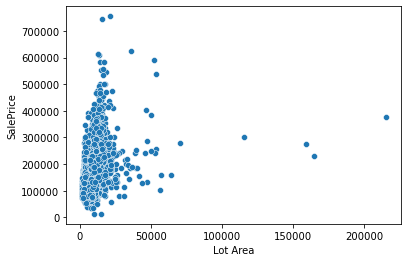

In [9]:
# detecting outliers 
sns.scatterplot(data=df,x='Lot Area',y='SalePrice')

In [10]:
df[df['Lot Area'] > 100000]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
956,916176125,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
1570,916125425,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
2071,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
2115,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000


In [46]:
df = df[df['Lot Area'] < 100000]

In [25]:
# missing data
nullcount = {}
for i in df.columns:
    nullcount[i] = (len(df[df[i].isnull()]) / len(df)) * 100

#### null value count for each feature

In [26]:
nullcount

{'PID': 0.0,
 'MS SubClass': 0.0,
 'MS Zoning': 0.0,
 'Lot Frontage': 16.643882433356115,
 'Lot Area': 0.0,
 'Street': 0.0,
 'Alley': 93.23308270676691,
 'Lot Shape': 0.0,
 'Land Contour': 0.0,
 'Utilities': 0.0,
 'Lot Config': 0.0,
 'Land Slope': 0.0,
 'Neighborhood': 0.0,
 'Condition 1': 0.0,
 'Condition 2': 0.0,
 'Bldg Type': 0.0,
 'House Style': 0.0,
 'Overall Qual': 0.0,
 'Overall Cond': 0.0,
 'Year Built': 0.0,
 'Year Remod/Add': 0.0,
 'Roof Style': 0.0,
 'Roof Matl': 0.0,
 'Exterior 1st': 0.0,
 'Exterior 2nd': 0.0,
 'Mas Vnr Type': 0.7860560492139439,
 'Mas Vnr Area': 0.7860560492139439,
 'Exter Qual': 0.0,
 'Exter Cond': 0.0,
 'Foundation': 0.0,
 'Bsmt Qual': 2.734107997265892,
 'Bsmt Cond': 2.734107997265892,
 'Bsmt Exposure': 2.836637047163363,
 'BsmtFin Type 1': 2.734107997265892,
 'BsmtFin SF 1': 0.03417634996582365,
 'BsmtFin Type 2': 2.768284347231716,
 'BsmtFin SF 2': 0.03417634996582365,
 'Bsmt Unf SF': 0.03417634996582365,
 'Total Bsmt SF': 0.03417634996582365,
 'Heati

In [32]:
print('features with more than 80 percent missing values:')
for i in nullcount:
    if nullcount[i] > 80:
        print(i)

features with more than 80 percent missing values:
Alley
Pool QC
Fence
Misc Feature


In [47]:
# removing features with more than 80% missing values.
df = df.drop(['Alley','Pool QC', 'Fence' , 'Misc Feature'], axis=1)

In [49]:
df = df.fillna(value='None')

In [50]:
df = pd.get_dummies(df,drop_first=True)

## building a linear regression model to predict prices.

In [51]:
X = df.drop('SalePrice',axis=1)
Y = df['SalePrice']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [57]:
from sklearn.linear_model import Ridge
alpha = [0.1,0.3,0.5,0.7,0.9,1,5,10,2,20,50,100]
for a in alpha:
    model = Ridge(a)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    mse = np.sqrt(np.sum((y_test - preds)**2)/len(preds))
    print('alpha:',end=' ')
    print(a)
    print('mean squared error:', end = ' ')
    print(mse)
    print('------------------------------')

alpha: 0.1
mean squared error: 35623.25993211368
------------------------------
alpha: 0.3
mean squared error: 35623.25993211368
------------------------------
alpha: 0.5
mean squared error: 35623.25993211368
------------------------------
alpha: 0.7
mean squared error: 35623.25993211368
------------------------------
alpha: 0.9
mean squared error: 35623.25993211368
------------------------------
alpha: 1
mean squared error: 35623.25993211368
------------------------------
alpha: 5
mean squared error: 35641.86870681147
------------------------------
alpha: 10
mean squared error: 35628.12294265983
------------------------------
alpha: 2
mean squared error: 35633.55346223525
------------------------------
alpha: 20
mean squared error: 35645.83250122019
------------------------------
alpha: 50
mean squared error: 35632.347318810826
------------------------------
alpha: 100
mean squared error: 35886.08556945765
------------------------------


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
# with standardized features
alpha = [1,5,10,20,50,100]
for a in alpha:
    model = Ridge(a)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    mse = np.sqrt(np.sum((y_test - preds)**2)/len(preds))
    print('alpha:',end=' ')
    print(a)
    print('mean squared error:', end = ' ')
    print(mse)
    print('------------------------------')

alpha: 1
mean squared error: 38376.43060832864
------------------------------
alpha: 5
mean squared error: 33990.446130114404
------------------------------
alpha: 10
mean squared error: 32898.095110639166
------------------------------
alpha: 20
mean squared error: 31937.161051128525
------------------------------
alpha: 50
mean squared error: 30835.534393225036
------------------------------
alpha: 100
mean squared error: 30173.89574126282
------------------------------


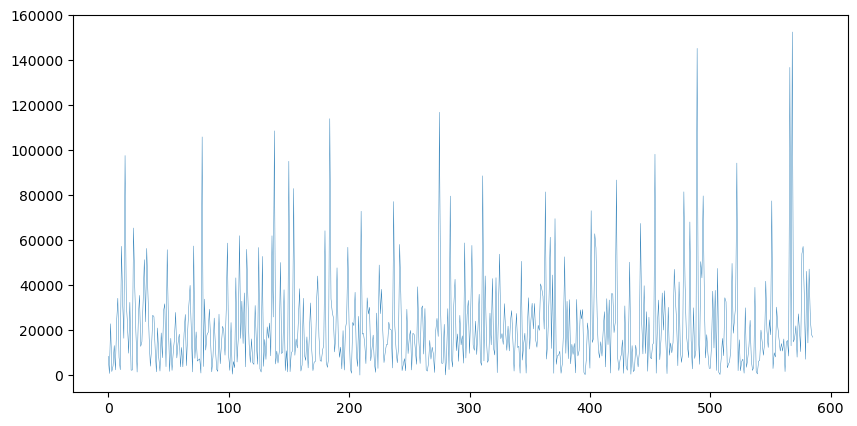

In [87]:
y_test = pd.DataFrame(y_test)
y_test['predicted'] = preds
plt.figure(figsize=(10,5),dpi=100)
plt.plot(np.arange(0,len(preds)), np.abs(y_test['SalePrice'] - y_test['predicted']),lw=0.3)

In [93]:
from sklearn.linear_model import ElasticNet
l1 = [0.2,0.5,0.7,0.9,1]
for l in l1:
    model = ElasticNet(l1_ratio=l)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    mse = np.sqrt(np.sum((y_test - preds)**2)/len(preds))
    print('l1_ratio:',end=' ')
    print(l)
    print('mean squared error:', end = ' ')
    print(mse)
    print('------------------------------')

l1_ratio: 0.2
mean squared error: 29698.09090488647
------------------------------
l1_ratio: 0.5
mean squared error: 29351.2580095087
------------------------------
l1_ratio: 0.7
mean squared error: 29234.384399890478
------------------------------
l1_ratio: 0.9
mean squared error: 29487.37960855775
------------------------------
l1_ratio: 1
mean squared error: 43959.07489922831
------------------------------


In [97]:
np.mean(df['SalePrice'])

180638.92891319207